In [2]:
import datetime

import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt
import seaborn as sns 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

import os

In [2]:
data = pd.read_csv('./spanish_high_speed_rai_-system_ticket_pricing/renfe.csv', parse_dates=['insert_date', 'start_date', 'end_date'])

# Задача

Будет решаться задача определения маршрута (задача классификации) на 8 классов (обратный рейс учитывается как отдельный маршрут) между пятью городами на примере базы данных пассажирских отправлений скоростных поездов в испании

# Описание данных

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671354 entries, 0 to 7671353
Data columns (total 9 columns):
insert_date    datetime64[ns]
origin         object
destination    object
start_date     datetime64[ns]
end_date       datetime64[ns]
train_type     object
price          float64
train_class    object
fare           object
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 526.8+ MB


,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 05:50:00,2019-04-18 08:55:00,AVE,68.95,Preferente,Promo
1,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 06:30:00,2019-04-18 09:20:00,AVE,75.40,Turista,Promo
2,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:00:00,2019-04-18 09:30:00,AVE,106.75,Turista Plus,Promo
3,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 07:30:00,2019-04-18 10:40:00,AVE,90.50,Turista Plus,Promo
4,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 08:00:00,2019-04-18 10:30:00,AVE,88.95,Turista,Promo


* insert_date: date and time when the price was collected and written in the database, scrapping time (UTC)
* origin: origin city
* destination: destination city
* start_date: train departure time (European Central Time)
* end_date: train arrival time (European Central Time)
* train_type: train service name - название обслуживающей компании
* price: price (euros)
* train_class: ticket class, tourist, business, etc. - тип вагона в который взят билет
* fare: ticket fare, round trip, etc. - тип билета

## Число выбросов

In [4]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


insert_date    0.00
origin         0.00
destination    0.00
start_date     0.00
end_date       0.00
train_type     0.00
price          7.47
train_class    0.35
fare           0.35
dtype: float64

###### данных достаточно, поэтому выбросим пропуски

In [5]:
data.dropna(how ='any', inplace = True)

## Количество уникальных значений

In [6]:
data.apply(lambda x: x.unique().size)

insert_date    420317
origin              5
destination         5
start_date      19191
end_date        24832
train_type         15
price             335
train_class         9
fare               10
dtype: int64

# Обзор данных

Text(0.5, 1.0, 'Tickets to destination')

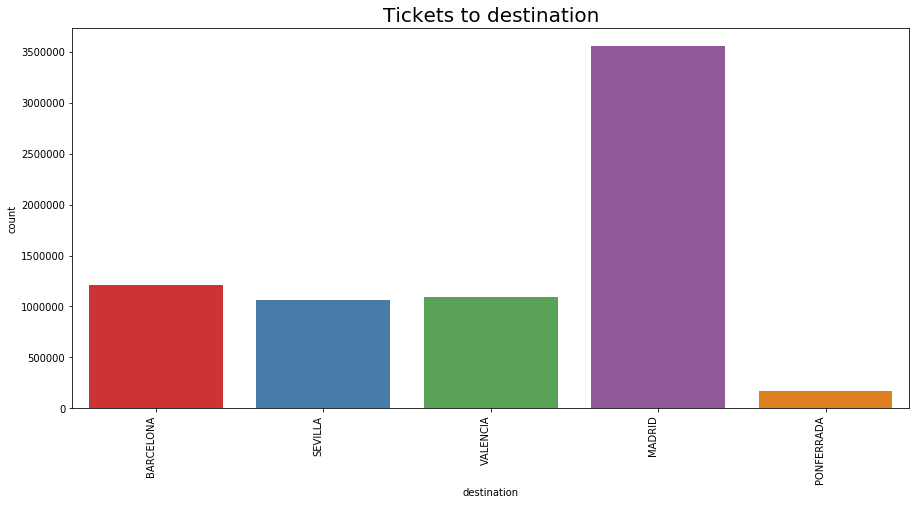

In [7]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="destination",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Tickets to destination',size = 20)

Text(0.5, 1.0, 'Tickets sales from origin')

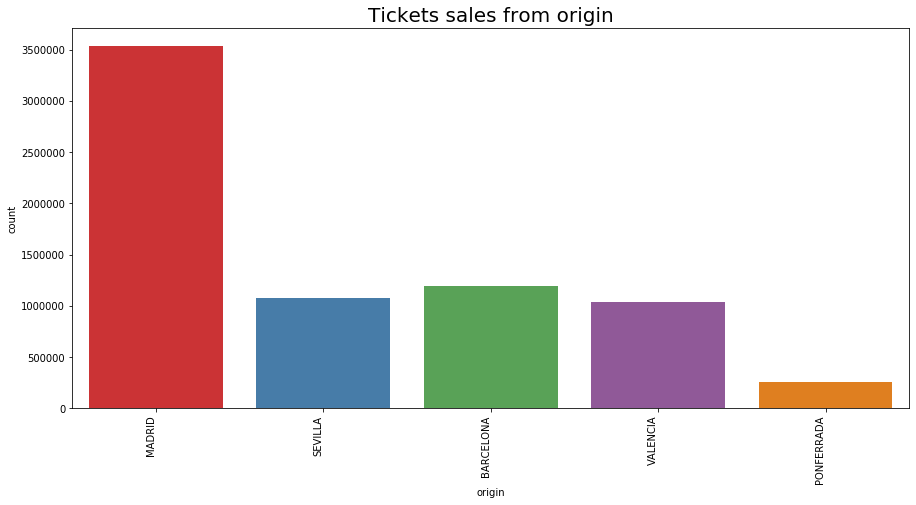

In [8]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="origin",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Tickets sales from origin',size = 20)

Text(0.5, 1.0, 'Train Type')

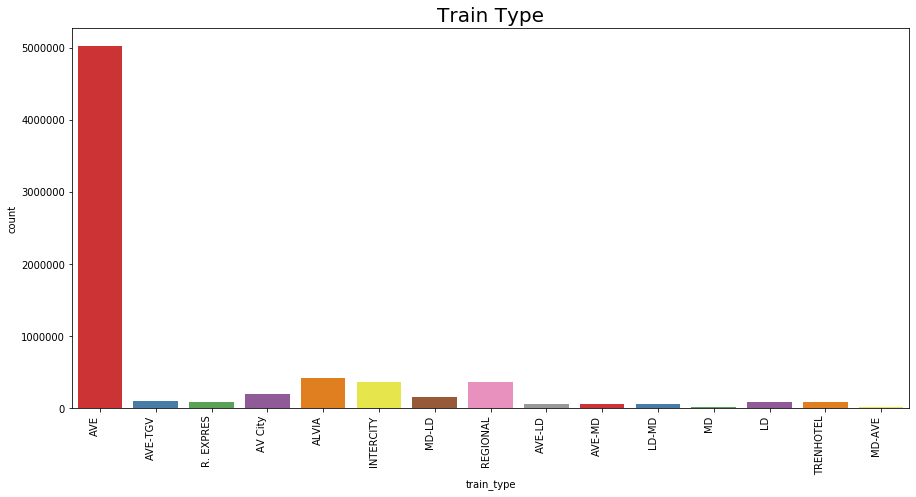

In [9]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="train_type",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Train Type',size = 20)

Text(0.5, 1.0, 'Train class')

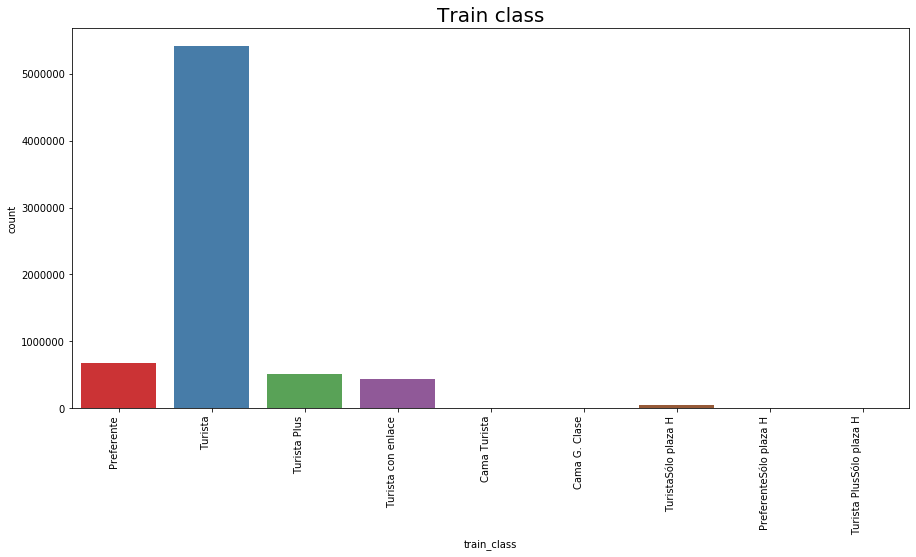

In [10]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="train_class",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Train class',size = 20)

Text(0.5, 1.0, 'Fare')

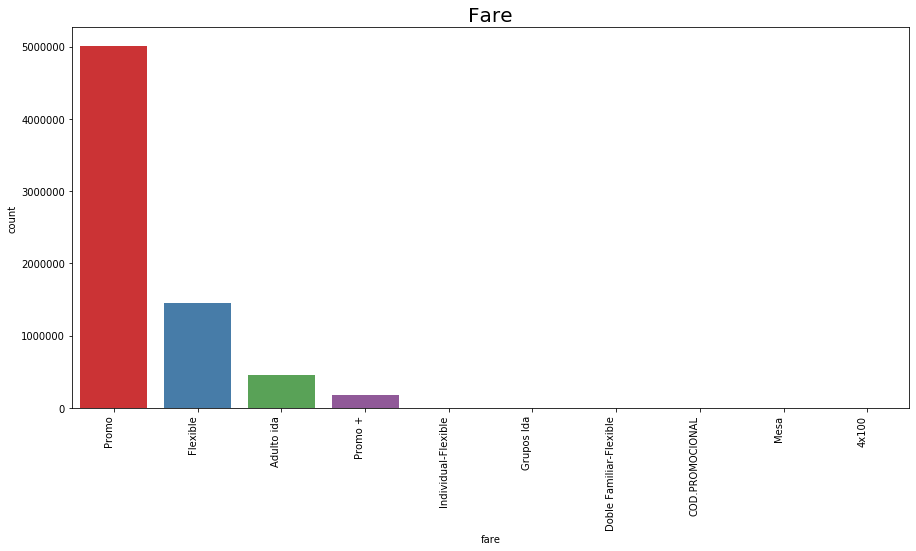

In [11]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="fare",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('Fare',size = 20)

Text(0.5, 1.0, 'Price Distrubution for all tickets')

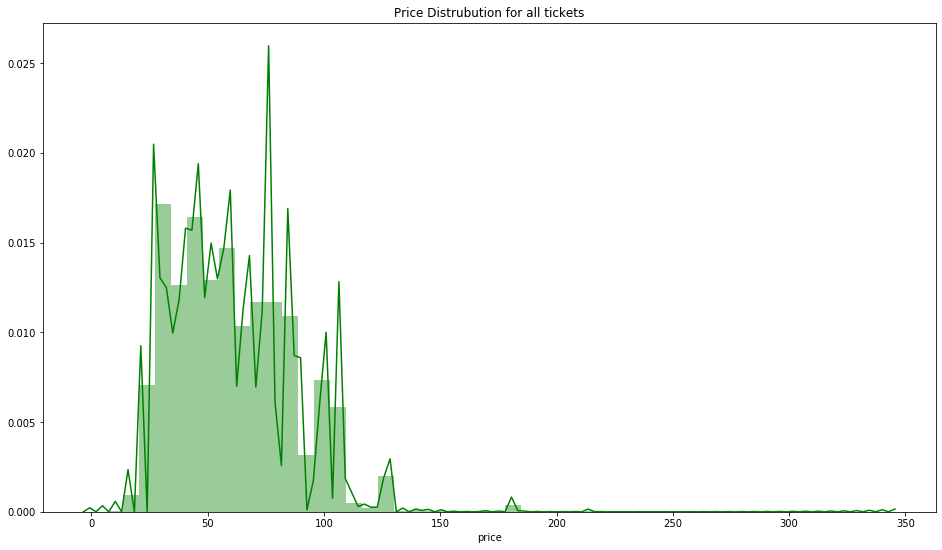

In [12]:
X=data
X.head()
#X.price = X.price.apply(lambda x: x.replace(',',''))
X.price = X.price.astype(int)
fig, ax = plt.subplots(figsize=[16,9])
sns.distplot(X['price'],ax=ax,color='green')
ax.set_title('Price Distrubution for all tickets')

Text(0.5, 1.0, 'Price Distrubution of tickets with respect citys')

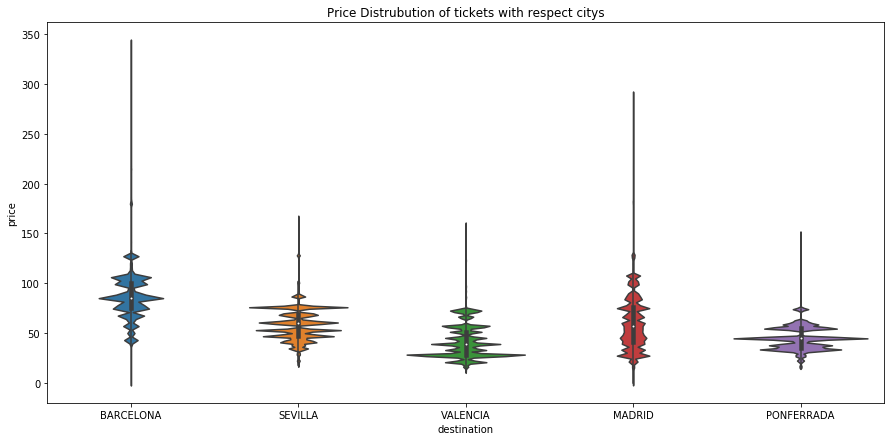

In [13]:
sns.violinplot(x=data.destination, y=data.price);
plt.title('Price Distrubution of tickets with respect citys')

Text(0.5, 1.0, 'Price Distrubution of tickets with respect to Train Type')

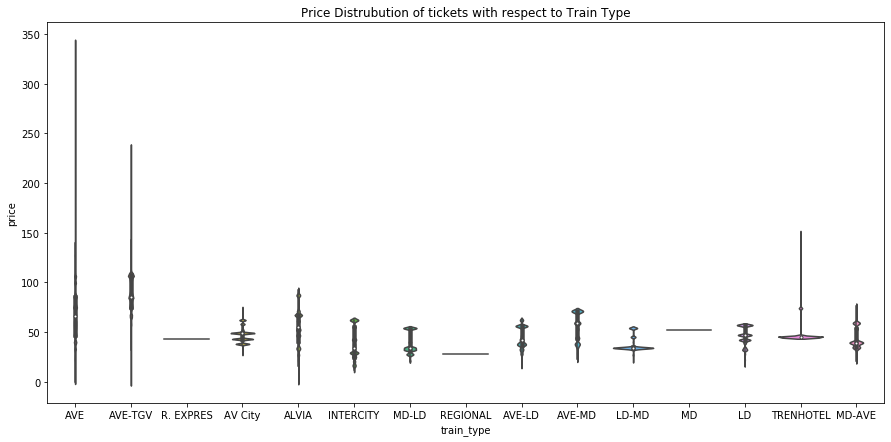

In [14]:
sns.violinplot(x=data.train_type, y=data.price);
plt.title('Price Distrubution of tickets with respect to Train Type')

Text(0.5, 1.0, 'Price Distrubution of tickets with respect to train origin')

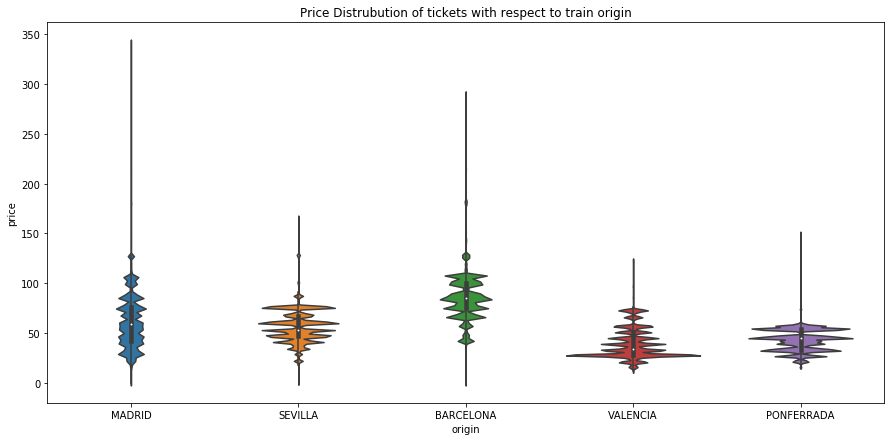

In [15]:
sns.violinplot(x=data.origin, y=data.price);
plt.title('Price Distrubution of tickets with respect to train origin')

Text(0.5, 1, ' Average Ticket Price with respect to train origin')

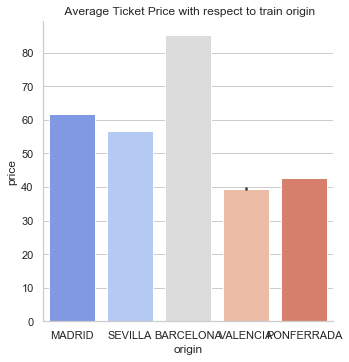

In [16]:

sns.set(style="whitegrid")
sns.catplot(x="origin", y="price",  kind="bar",palette='coolwarm', data=data);
plt.title(' Average Ticket Price with respect to train origin')

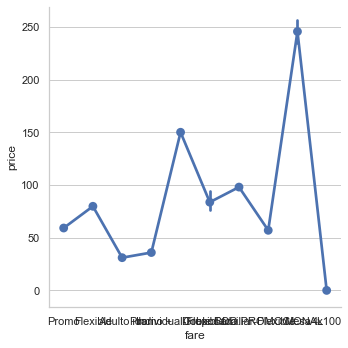

In [17]:
sns.catplot(x="fare", y="price",kind="point", data=data);


Text(0.5, 0, 'Citys')

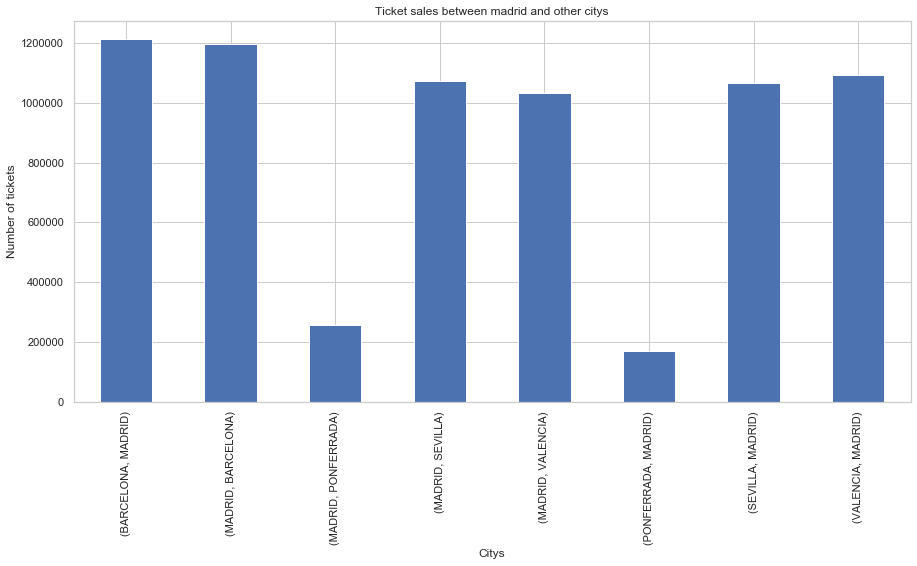

In [18]:
data.groupby(['destination','origin']).size().plot(kind='bar', stacked=True)
plt.title('Ticket sales between madrid and other citys')
plt.ylabel('Number of tickets')
plt.xlabel('Citys')

Оставим только 4 типа билета тк по остальным крайне мало данных

In [19]:
most_usable = ((data.fare.value_counts()/data.fare.shape[0])*100).index.values[:4]
data = data[data.fare.isin(most_usable)]
data.dropna(inplace=True)
data.shape

(7094610, 9)

# Обработка данных

In [20]:
data.start_date.head()

0   2019-04-18 05:50:00
1   2019-04-18 06:30:00
2   2019-04-18 07:00:00
3   2019-04-18 07:30:00
4   2019-04-18 08:00:00
Name: start_date, dtype: datetime64[ns]

'%Y-%m-%d %H:%M:%S' format

## Извлечем из даты отправления\прибытия признаки

### время в пути

In [21]:
get_minutes = lambda x: x.seconds/60
data['travel_time_min'] = (data.end_date - data.start_date).apply(get_minutes)
data['travel_time_min'].describe()

count    7.094610e+06
mean     1.857852e+02
std      9.463049e+01
min      9.800000e+01
25%      1.500000e+02
50%      1.580000e+02
75%      1.900000e+02
max      7.450000e+02
Name: travel_time_min, dtype: float64

###  день поездки

In [22]:
data['travel_day'] = data.start_date.apply(lambda x: x.dayofweek)

### Выходные это или нет? (включая вечер пятницы (с 16:00, условно)

In [23]:
def is_week_end(data):
    # 'Saturday', 'Sunday'
    weekend = [5,6]
    week_day = data.dayofweek
    if week_day in weekend:
        return 1
    # 'Friday'
    if week_day==4 and data.hour>=16:
        return 1
    return 0

In [24]:
data['week_end'] = data.start_date.apply(is_week_end)

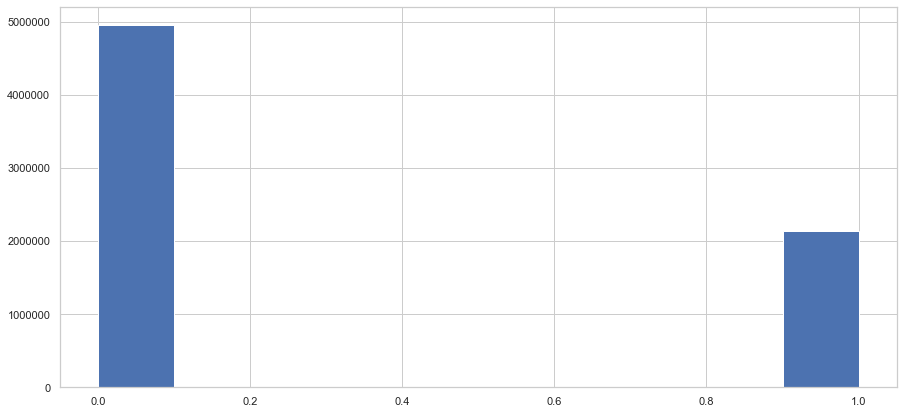

In [25]:
plt.hist(data['week_end'])
plt.show()

### Binary Day of Week

In [26]:
def get_days_of_weeks(start_days):
    def create_row(date):
        week = np.zeros(7)
        week[date.dayofweek] = 1
        return week
    return pd.DataFrame(np.vstack(start_days.apply(create_row).values), 
                        columns=['Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    

In [27]:
days_of_week_binary = get_days_of_weeks(data.start_date)

In [28]:
days_of_week_binary.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


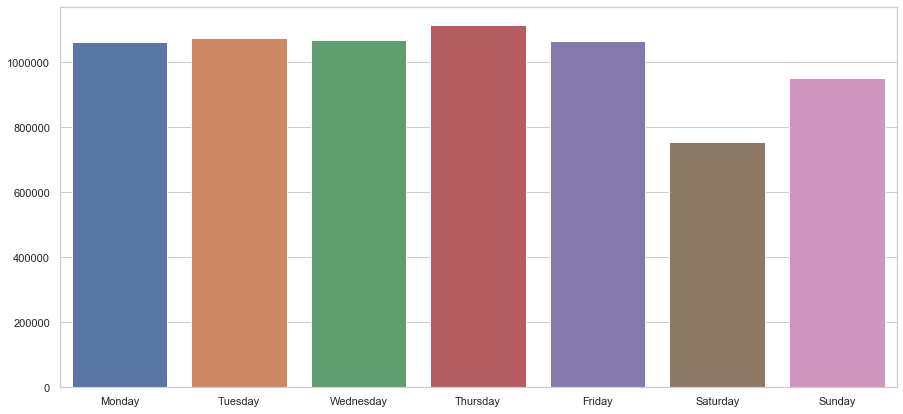

In [29]:
week_counts = days_of_week_binary.apply(lambda x: (x==1).sum())
sns.barplot(x = week_counts.index, y = week_counts.values)
plt.show()

In [30]:
data = pd.concat([data,days_of_week_binary], axis = 1)

# Преобразуем Источник - Сток к Маршруту

In [31]:
data['route'] = (data['origin'] + '_' + data['destination'])

In [41]:
data['route'].unique()

array(['MADRID_BARCELONA', 'MADRID_SEVILLA', 'MADRID_VALENCIA',
       'SEVILLA_MADRID', 'MADRID_PONFERRADA', 'BARCELONA_MADRID',
       'VALENCIA_MADRID', 'PONFERRADA_MADRID'], dtype=object)

In [33]:
data['route'].value_counts() / data['route'].shape[0]

MADRID_BARCELONA     0.158522
BARCELONA_MADRID     0.156342
MADRID_VALENCIA      0.142751
SEVILLA_MADRID       0.140387
MADRID_SEVILLA       0.139536
VALENCIA_MADRID      0.135297
PONFERRADA_MADRID    0.033575
MADRID_PONFERRADA    0.022144
Name: route, dtype: float64

In [43]:
route_type_data = dict(list(zip(data.route.unique().tolist(),list(range(data.route.unique().size)))))
def get_route_type(route):
    global route_type_data
    return route_type_data[route]

In [36]:
data['route'].value_counts()

MADRID_BARCELONA     1211189
BARCELONA_MADRID     1194530
MADRID_VALENCIA      1090690
SEVILLA_MADRID       1072627
MADRID_SEVILLA       1066122
VALENCIA_MADRID      1033737
PONFERRADA_MADRID     256527
MADRID_PONFERRADA     169188
Name: route, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
# data['route_type'] = le.fit_transform(data['route'])
data['route_type'] = data['route'].apply(get_route_type)

In [45]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6548732 entries, 0 to 7094609
Data columns (total 21 columns):
insert_date        datetime64[ns]
origin             object
destination        object
start_date         datetime64[ns]
end_date           datetime64[ns]
train_type         object
price              float64
train_class        object
fare               object
travel_time_min    float64
travel_day         float64
week_end           float64
Monday             float64
Tuesday            float64
Wednesday          float64
Thursday           float64
Friday             float64
Saturday           float64
Sunday             float64
route              object
route_type         int64
dtypes: datetime64[ns](3), float64(11), int64(1), object(6)
memory usage: 1.1+ GB


### Route length

In [46]:
route_len_data = dict(list(zip(data.route.unique().tolist(),[616, 472, 354, 472, 338, 354, 338, 616])))
def get_route_len(route):
    global route_len_data
    return route_len_data[route]

In [47]:
data['route_len'] = data['route'].apply(get_route_len)

## fare

Promo: These are based on a dynamic pricing system with heavy discounts on AVE and Larga Distancia (Long-Distance) trains on domestic journeys, which are set depending on the train, date of travel and advance purchase.<br><br>
Flexible: The Flexible Ticket is a commercial offer for AVE and Larga Distancia (Long-Distance) services only across all classes and seats (seats and berths). It is the same price as the General fare without any discount, but comes with additional offers that enable passengers to obtain better conditions for changes, cancellations or if they miss their train.<br><br>
Promo+: These are based on a dynamic pricing system with heavy discounts on AVE and Larga Distancia (Long-Distance) trains on domestic journeys, which are set depending on the train, date of travel and advance purchase, and without lowering any quality standards

In [48]:
data.fare.unique()

array(['Promo', 'Flexible', 'Adulto ida', 'Promo +'], dtype=object)

###### make dummy ranking

In [53]:
fare_type_data = dict(list(zip(data.fare.unique().tolist(),[1,4,3,2])))
fare_type_data
def get_fare_type(fare):
    global fare_type_data
    return fare_type_data[fare]

In [54]:
data['fare'] = data['fare'].apply(get_fare_type)

## Train type

AVE: In Spain With 3,100km of track the Spanish high-speed AVE trains operate on the longest high-speed network in Europe. Running at speeds of up to 310 km/h this extensive network allows for fast connections between cities in Spain. Travel from Madrid to Barcelona in less than 3 hours! This modern train system connects many cities across Spain from Madrid and Barcelona, to Córdoba, Seville, Málaga and Valencia.<br><br>
ALVIA: The Spanish Alvia trains combine both a long distance and a high-speed service to connect major cities across Spain. The Alvia offers many routes such as connections from Madrid to Gijón, Alicante and Castellón and from Barcelona to Bilbao, A Coruña and Vigo. With air conditioned carriages and check-in control before boarding the Alvia is comfortable and relaxed way to traverse one of Europe's biggest countries.<br><br>
REGIONAL: Regional and intercity trains in Spain. FEVE trains operate in the north of Spain, connecting cities like Bilbao, Gijón, León and Santander. Cercanías (suburban trains) is a network of trains that operates in and around the larger Spanish cities including Barcelona and Valencia.<br><br>
INTERCITY: Traditional intercity trains travelling between 160 do 250 km/h allow you to reach nearly every corner of Spain. You can choose to travel in 2nd class (Turista) or 1st class (Preferente). The comfort of the carriages is close to that of the high-speed AVE trains. All trains are air-conditioned.<br><br>
AV City :The ave city trains are high speed train to complement the AVE to offer lower prices and marketed in economy class (p) and economy plus (p+)<br><br>
Less distance(LD) - Medium distance(MD): The LD-AVE and MD-AVE on the list of trains is for an indirect service that uses a comination of the regular trains (either the LD - Larga Distancia/Long Distance or the MD - Media Distancia/Medium Distance). Those trains requires a change (usually in Zaragoza or Valencia) so, due to the change and the lower speed trains on part of the way. The journey is longer but the tickets are cheaper.<br><br>
The LD,AVE-MD,AVE-LD,LD-MD,MD-AVE,MD,LD-AVE slightly falls under above category.<br><br>
TRENHOTEL: Trenhotel are night trains running in Spain and from Spain to Portugal. The trains are consisting of Talgo articulated stock, providing a very comfortable and smooth ride. There are different kinds of trains in use, offering different kinds of services. Older trains convey 2nd class seats, four bed sleepers, 2 bed sleepers and 2 bed sleepers with ensuite shower and WC. Newer trains convey only 1st class reclining seats and 2 bed sleepers with ensuite shower and WC. All trains have a bistro carriage.

**Основываясь на вышесказанном: Ave Alvia - top; Regional and Intercity - medium; others - lowest; TRENHOTEL - Different from others class**<br>
**Ночные переезды стоит отсеять или рассматривать отдельно** тк там своя классификация, необходима доп информация

###### del night trains

In [56]:
data = data[data.train_type != 'TRENHOTEL']
data.shape

(6473154, 22)

In [57]:
data.train_type.unique()
# [3,3,2,1,3,2,1,2,1,1,1,1,1,1]

array(['AVE', 'AVE-TGV', 'R. EXPRES', 'AV City', 'ALVIA', 'INTERCITY',
       'MD-LD', 'REGIONAL', 'AVE-LD', 'AVE-MD', 'LD-MD', 'MD', 'LD',
       'MD-AVE'], dtype=object)

In [59]:
# dummy ranking
train_type_data = dict(list(zip(data.train_type.unique().tolist(),[3,3,2,1,3,2,1,2,1,1,1,1,1,1])))
def get_train_type_class(train_type):
    global train_type_data
    return train_type_data[train_type]

In [60]:
data['train_type_class'] = data['train_type'].apply(get_train_type_class)

## Train class

Turista and Preferente: Spanish long-distance trains generally have two classes. Turista = 2nd class(Least expensive) and Preferente = 1st class(Expensive). On weekdays on AVE & EuroMed high-speed trains, Preferente usually includes a hot airline-style meal & wine.<br><br>
Remaining columns comes under turista with different prices. <br><br>
Cama G. Clase : Night trains with berths.

In [61]:
data.train_class.unique()

array(['Preferente', 'Turista', 'Turista Plus', 'Turista con enlace',
       'TuristaSólo plaza H', 'PreferenteSólo plaza H',
       'Turista PlusSólo plaza H'], dtype=object)

In [65]:
# dummy ranking
train_class_data = dict(list(zip(data.train_class.unique().tolist(),[6,1,2,3,4,7,5])))
print('following ranking')
print(train_class_data)
def get_train_class_enc(train_class):
    global train_class_data
    return train_class_data[train_class]

following ranking
{'Preferente': 6, 'Turista': 1, 'Turista Plus': 2, 'Turista con enlace': 3, 'TuristaSólo plaza H': 4, 'PreferenteSólo plaza H': 7, 'Turista PlusSólo plaza H': 5}


In [66]:
data['train_class_enc'] = data['train_class'].apply(get_train_class_enc)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6473154 entries, 0 to 7094609
Data columns (total 24 columns):
insert_date         datetime64[ns]
origin              object
destination         object
start_date          datetime64[ns]
end_date            datetime64[ns]
train_type          object
price               float64
train_class         object
fare                int64
travel_time_min     float64
travel_day          float64
week_end            float64
Monday              float64
Tuesday             float64
Wednesday           float64
Thursday            float64
Friday              float64
Saturday            float64
Sunday              float64
route               object
route_type          int64
route_len           int64
train_type_class    int64
train_class_enc     int64
dtypes: datetime64[ns](3), float64(11), int64(5), object(5)
memory usage: 1.2+ GB


In [68]:
data.to_csv('handled_spain_trains_dataset.csv')

# Modeling

In [3]:
data = pd.read_csv('handled_spain_trains_dataset.csv', parse_dates=['insert_date', 'start_date', 'end_date'], index_col = 0)

Необходимо выкинуть изначальные признаки ввиду их неюзабельности, нормализовать полученные числовые признаки, тк при подсчете меры близости небинарные признаки возьмут полностью "поглотят" бинарные. Их вклад потеряется.

In [4]:
data.drop(columns=['insert_date','train_class', 'origin', 
                   'destination', 'start_date','end_date',
                   'train_type', 'route'], inplace = True)

In [99]:
data.describe()

,price,fare,travel_time_min,travel_day,week_end,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,route_type,route_len,train_type_class,train_class_enc
count,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06,6.473154e+06
mean,6.101668e+01,1.736805e+00,1.836493e+02,2.868670e+00,3.028099e-01,1.495782e-01,1.512649e-01,1.508211e-01,1.572073e-01,1.503473e-01,1.067327e-01,1.340486e-01,2.943434e+00,4.405596e+02,2.698368e+00,1.706781e+00
std,2.575965e+01,1.218440e+00,9.291117e+01,1.968595e+00,4.594737e-01,3.566576e-01,3.583069e-01,3.578744e-01,3.639961e-01,3.574115e-01,3.087731e-01,3.407045e-01,2.198257e+00,1.037317e+02,6.270756e-01,1.526663e+00
min,0.000000e+00,1.000000e+00,9.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.380000e+02,1.000000e+00,1.000000e+00
25%,4.100000e+01,1.000000e+00,1.500000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.540000e+02,3.000000e+00,1.000000e+00
50%,5.800000e+01,1.000000e+00,1.580000e+02,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,4.720000e+02,3.000000e+00,1.000000e+00
75%,7.600000e+01,3.000000e+00,1.900000e+02,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,4.720000e+02,3.000000e+00,1.000000e+00
max,2.350000e+02,4.000000e+00,7.450000e+02,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,7.000000e+00,6.160000e+02,3.000000e+00,7.000000e+00


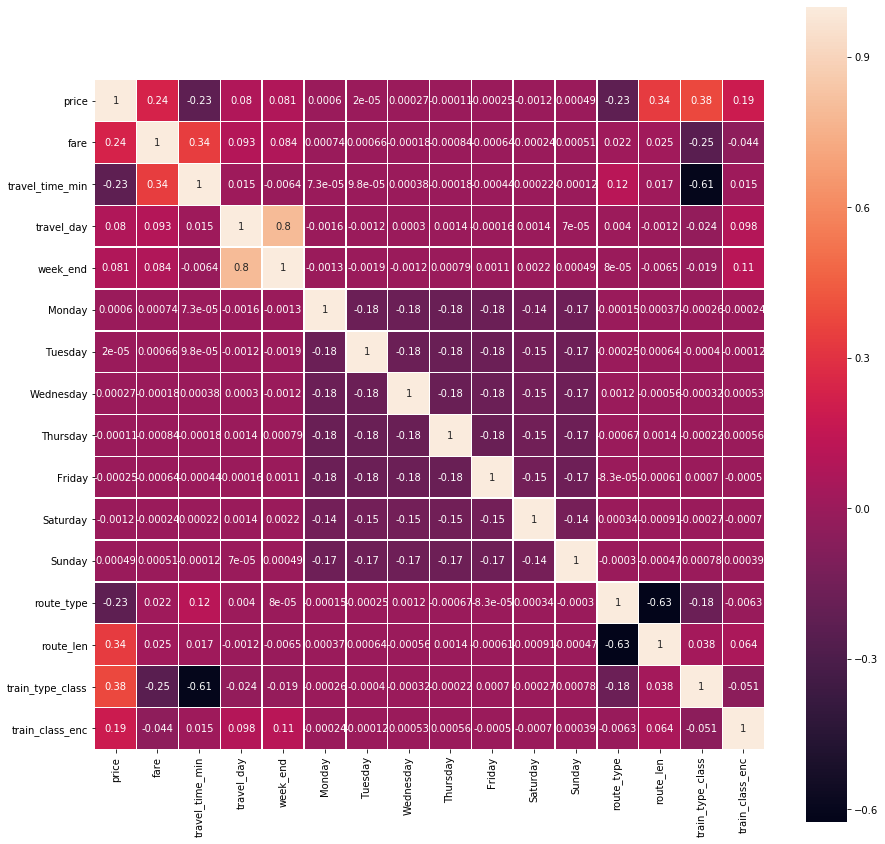

In [15]:
plt.figure(figsize=(15,15))
cormat = data.corr()
# sns.heatmap(data=cormat,annot=True,cmap="bone",linewidths=1,fmt=".2f",linecolor="gray")
sns.heatmap(cormat, square=True, annot=True, linewidths=.5)
# plt.title("Correlation Map",fontsize=4)
plt.show()

### Normalize

In [5]:
dataX = data[['price', 'fare', 'travel_time_min', 'week_end', 'route_len', 'train_type_class']]
dataX = (dataX - dataX.mean()) / dataX.std()
dataY = data.route_type

### train_test_split

In [6]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size = 0.8, random_state = 42)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
from sklearn.metrics import accuracy_score

In [14]:
pred = knn.predict(testX[:10000])
print(accuracy_score(testY[:10000], pred))

0.9313


In [ ]:
def boxes_of_attribute(news_in_time_and_spase):
    isMain_ignore = 0
    plt.subplots(figsize=(14, 11))
    for col_idx in range(1,news_in_time_and_spase.columns.size+1):
        col = news_in_time_and_spase.columns[col_idx-1]
        if col == u'isMain':
            isMain_ignore = 1
            continue
        plt.subplot(4,4,(col_idx - isMain_ignore))
        bp = (sns.boxplot(x="isMain", y=col, data=news_in_time_and_spase))
        #print(col)
    plt.tight_layout()
    plt.show()
    
    

In [16]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1747    0    0    0    0    0    0    0]
 [   0 1442    0  155    0    0    0    0]
 [   0    0 1572    0    0    0    0    0]
 [   0  532    0  945    0    0    0    0]
 [   0    0    0    0  201    0    0    0]
 [   0    0    0    0    0 1648    0    0]
 [   0    0    0    0    0    0 1487    0]
 [   0    0    0    0    0    0    0  271]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.9  0.   0.1  0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.36 0.   0.64 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


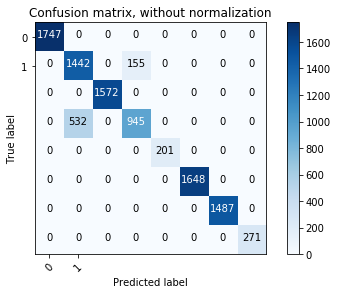

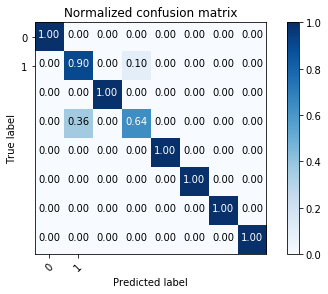

In [17]:
cnf_matrix = confusion_matrix(testY[:10000], pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(trainX,trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
pred = knn.predict(testX[:10000])
print(accuracy_score(testY[:10000], pred))

0.9441


Confusion matrix, without normalization
[[1747    0    0    0    0    0    0    0]
 [   0 1322    0  275    0    0    0    0]
 [   0    0 1572    0    0    0    0    0]
 [   0  284    0 1193    0    0    0    0]
 [   0    0    0    0  201    0    0    0]
 [   0    0    0    0    0 1648    0    0]
 [   0    0    0    0    0    0 1487    0]
 [   0    0    0    0    0    0    0  271]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.83 0.   0.17 0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.19 0.   0.81 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.  ]]


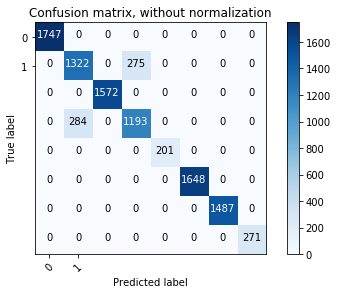

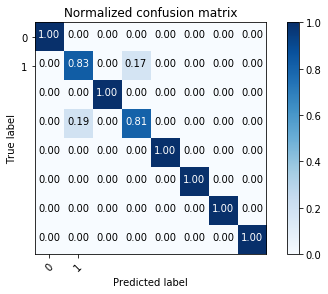

In [20]:
cnf_matrix = confusion_matrix(testY[:10000], pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')
plt.show()

## За счет высококоррелирующего с целевой переменной признака "длина маршрута" задача хорошо решается, если его убрать то модель сильно деградирует

## Проверим этот факт но с другим классификатором

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(trainX, trainY)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
pred = dt_classifier.predict(testX[:10000])
print(accuracy_score(testY[:10000], pred))

0.948


In [13]:
trainX_no_len = trainX.drop(columns=['route_len'])
testX_no_len = testX.drop(columns=['route_len'])
dt_classifier.fit(trainX_no_len, trainY)
pred = dt_classifier.predict(testX_no_len[:10000])
print(accuracy_score(testY[:10000], pred))

0.8074


## Что и требовалось доказать, но тем не менее точность сносная

Confusion matrix, without normalization
Normalized confusion matrix


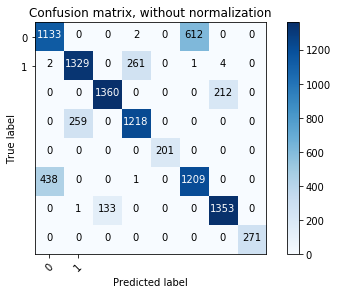

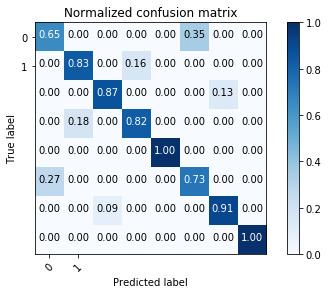

In [17]:
cnf_matrix = confusion_matrix(testY[:10000], pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1], normalize=True,
                      title='Normalized confusion matrix')
plt.show()